# Data visualization using **Folium**

Folium is a data visualization library in Python that allows visualizations of geospatial data. 

* It allows the creation of a map of any location in the world based on its latitude and longitude values.
* It is possible to create a map and superimpose markers on top of that map.
* https://github.com/python-visualization/folium/


## Imports

In [3]:
import numpy as np  
import pandas as pd 

import folium

In [4]:
folium.__version__

'0.18.0'

## First Examples

In [5]:
# define the world map 
world_map = folium.Map()
world_map

It is an interactive map!

## Create a Map of Romania

In [6]:
ro_map = folium.Map(
    location = [45.9432, 24.9668],
    zoom_start = 5
)

In [7]:
ro_map

The higher the zoom level the more the map is zoomed into the center.

In [8]:
ro_map = folium.Map(
    location = [45.9432, 24.9668],
    zoom_start = 8
)

In [9]:
ro_map

In [7]:
ro_map.save("index.html")

## Map Styles

https://python-visualization.github.io/folium/quickstart.html#Getting-Started

The default tiles are set to `OpenStreetMap`, but `Stamen Terrain`, `Stamen Toner`, `Mapbox Bright`, and `Mapbox Control Room`, and many others tiles are built in.

**Stamen Terrain** Maps

These are maps that feature hill shading and natural vegetation colors. 

In [10]:
ro_map = folium.Map(
    location = [45.9432, 24.9668],
    zoom_start = 7,
    tiles='Stamen Terrain'
)

ro_map

ValueError: Custom tiles must have an attribution.

Stamen Map Tiles are no longer freely available:

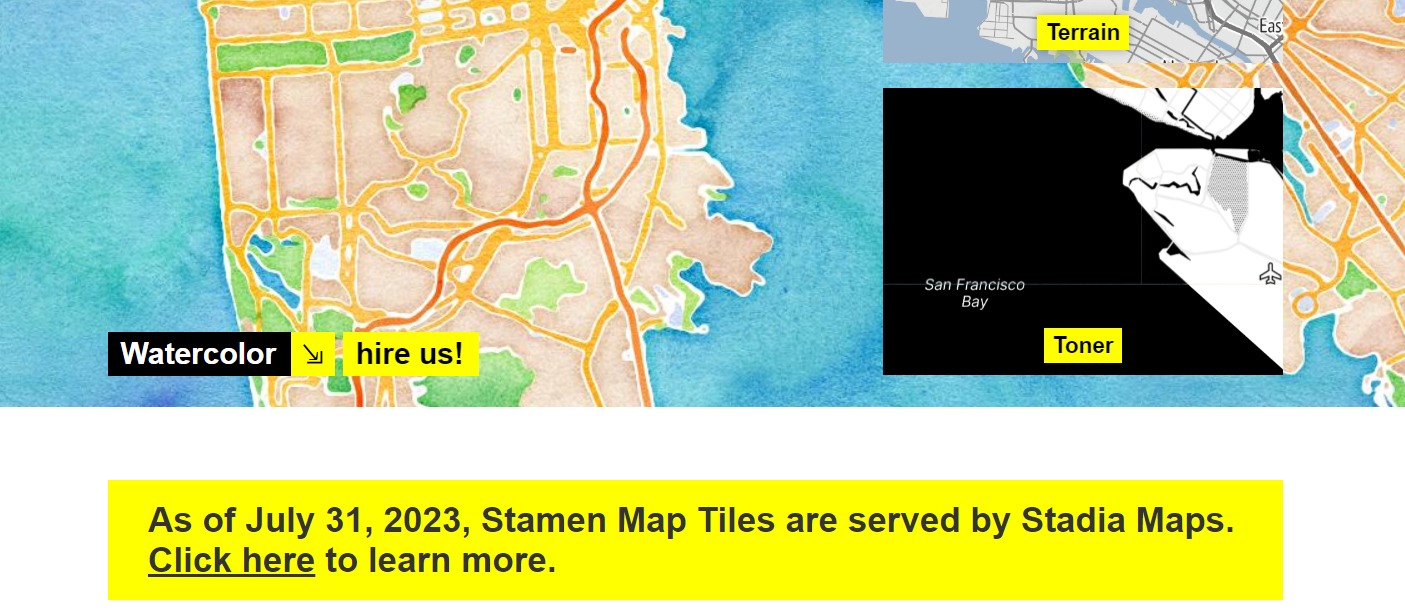

## "After October 2023, the redirects could stop working and those still pointing to stamen.com or fastly.com URLs will see a blank map."
https://maps.stamen.com/#terrain/12/37.7706/-122.3782

## SOLUTION:

Use tiles based on URL, list available here: https://leaflet-extras.github.io/leaflet-providers/preview/
Syntax:
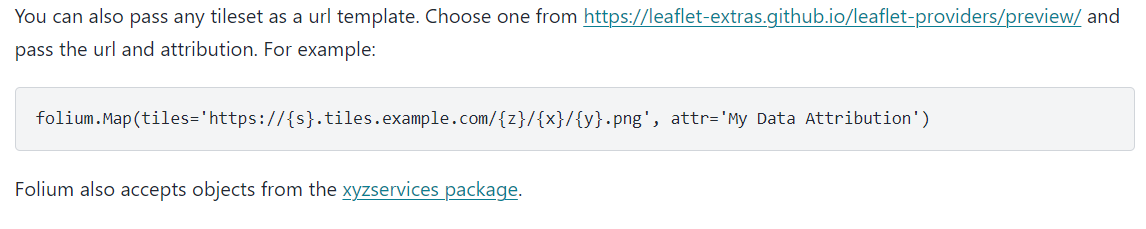

In [11]:
#folium.Map(tiles='https://{s}.tiles.example.com/{z}/{x}/{y}.png', attr='My Data Attribution')
#s3://long-term.cache.maps.stamen.com/watercolor/2/3/1.jpg
    
ro_map = folium.Map(
    location = [45.9432, 24.9668],
    zoom_start = 7,
    tiles='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png', attr='My Data Attribution'
)

ro_map

**Stamen Toner** Maps

These are high-contrast black and white maps.

In [12]:
ro_map = folium.Map(
    location = [45.9432, 24.9668],
    zoom_start = 6,
    #tiles='Stamen Toner'
    tiles='https://tiles.stadiamaps.com/tiles/stamen_toner/{z}/{x}/{y}{r}.png', attr='My Data Attribution'
)

ro_map

**<p style="color:red">EXERCISE 1</p>**

Create a map of Tenerife.

* Use a zoom start of: 5, 10
* Use 3 different styles as tiles including the following 2: Stamen Terrain, Stamen Watercolor


In [10]:
# Your solution here...



## Maps with Markers

In [16]:
ro_map = folium.Map(
    location = [45.9432, 24.9668],
    zoom_start = 8,
    tiles='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png', attr='My Data Attribution'
)

ro_map

Let's add a marker for Cluj-Napoca.

In [17]:
folium.Marker(
    location=[46.7784, 23.6172],
    popup="Cluj-Napoca"
).add_to(ro_map)

ro_map


In [18]:
tooltip = "Click me!"
folium.Marker(
    [47.0482, 21.9236], 
    popup="<i>Oradea</i>", 
    tooltip=tooltip
).add_to(ro_map)

folium.Marker(
    location=[47.6571, 23.5715],
    popup="Baia Mare",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(ro_map)

ro_map

In [14]:
ro_map = folium.Map(
    location = [45.9432, 24.9668],
    zoom_start = 8
)

#create a feature group
cluj = folium.map.FeatureGroup()
cluj.add_child(
    folium.features.CircleMarker(
        [46.7784, 23.6172], radius = 5,
        color = "red", fill_color = "red"
    )
)

#add the feature group to the map
ro_map.add_child(cluj)

#label the marker
folium.Marker(
    location=[46.7784, 23.6172],
    popup="Cluj-Napoca"
).add_to(ro_map)

ro_map

## Dataset: Police Department Incidents

The dataset consists of incidents that took place in San Francisco in 2016.

> 1.  **IncidntNum**: Incident Number
> 2.  **Category**: Category of crime or incident
> 3.  **Descript**: Description of the crime or incident
> 4.  **DayOfWeek**: The day of week on which the incident occurred
> 5.  **Date**: The Date on which the incident occurred
> 6.  **Time**: The time of day on which the incident occurred
> 7.  **PdDistrict**: The police department district
> 8.  **Resolution**: The resolution of the crime in terms whether the perpetrator was arrested or not
> 9.  **Address**: The closest address to where the incident took place
> 10. **X**: The longitude value of the crime location
> 11. **Y**: The latitude value of the crime location
> 12. **Location**: A tuple of the latitude and the longitude values
> 13. **PdId**: The police department ID

See also:
https://catalog.data.gov/dataset/police-department-incident-reports-2018-to-present

In [15]:
df_incidents = pd.read_csv("data\Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [16]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [17]:
df_incidents.shape

(150500, 13)

 In order to reduce computational cost, we will work with the first 100 incidents in this dataset.

In [18]:
# get the first 100 crimes in the df_incidents dataframe
df_incidents = df_incidents.iloc[0:100, :]

In [19]:
df_incidents.shape

(100, 13)

In [19]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map of San Francisco and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

Add to the San Francisco map the location of the incidents using feature groups with Folium.

In [21]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

Add some pop-up text that would get displayed when we hover over a marker. 

Make each marker display the category of the crime when hovered over.

In [22]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], tooltip=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

Sometimes the map is too congested with so many markers. We can keep only the circles:

In [23]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        tooltip=label, #popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

Also, we can group the markers into different clusters. 

Each cluster is represented by the number of crimes in each neighborhood. 

To implement this, we start off by instantiating a *MarkerCluster* object and adding all the data points in the dataframe to this object.

In [24]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        tooltip=label,
    ).add_to(incidents)

# display map
sanfran_map

When we zoom out completely, all markers are grouped into one cluster, *the global cluster*, of 100 markers or crimes, which is the total number of crimes in our dataframe. 

When we zoom in, the *global cluster* will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.

**<p style="color:red">EXERCISE 2</p>**

Create a **map of Romania** with the following properties:

* Use a zoom start of 8.
* Add a feature group and a marker for the following cities: *Cluj-Napoca*, *Sibiu* and *Timisoara*.
* The colours of these markers should be *green*, *pink*, *orange*.
* The icons for the three locations should be: *car*, *flag*, *plug* (selected from here: https://fontawesome.com/icons/categories/humanitarian)
* Add a black line from Cluj-Napoca to Sibiu and from Sibiu to Timisoara (see folium documentation: https://python-visualization.github.io/folium/quickstart.html#Polylines)
 

In [25]:
# Your solution here...



## Choropleth Maps

* A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of a statistical variable (such as population density or per-capita income). 
* The choropleth map provides an easy way to visualize how a measurement varies across a geographic area or it shows the level of variability within a region. 
* https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps


Choropleth map of the US depicting the population by square mile per state:

<img src = "images/2000_census_population_density_map_by_state.png" width = 600> 

## Canada Immigration Dataset

We will create a `Choropleth` map of the world depicting immigration from various countries to Canada.

*Dataset Preparation*

In [26]:
df_canada = pd.read_excel("data/Canada.xlsx", 
                    sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skipfooter=2)

# 1. Remove columns that are not necessary
df_canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# 2. Rename some columns
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# 3. Column labels should be strings
df_canada.columns = list(map(str, df_canada.columns))

# 4. Set the index to the country column
# df_canada.set_index('Country', inplace=True)

# 5. Add an extra column: Total
df_canada['Total'] = df_canada.sum(axis=1, numeric_only = True)

# Create a list of years from 1980 - 2013 as strings
years = list(map(str, range(1980, 2014)))

# Check the data
print('data dimensions:', df_canada.shape)
df_canada.head()

data dimensions: (195, 39)


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [27]:
df_canada[df_canada['Country'] == 'Romania']

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
142,Romania,Europe,Eastern Europe,Developed regions,375,438,583,543,524,604,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,93585


In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. 

For the world map, we want a GeoJSON that defines the boundaries of all world countries. 

File available in `data` folder: **world_countries.json** (e.g. Romania is at position 133).

In [28]:
world_geo = r'data/world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=3)

In [29]:
world_map

To create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1.  `geo_data`, which is the GeoJSON file;
2.  `data`, which is the dataframe containing the data;
3.  `columns`, which represents the columns in the dataframe that will be used to create the `Choropleth` map;
4.  `key_on`, which is the key or variable in the GeoJSON file that contains the name of the variable of interest (i.e. countries). Reading the GeoJSON file using any text editor we can see that **name** is the key in the GeoJSON file that contains the name of the countries. 


In [30]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
folium.Choropleth(
    geo_data=world_geo,
    data=df_canada,
    columns=['Country', 'Total'], # Must pass column 1 as the key, and column 2 the values.
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

# display map
world_map

The darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.

In [31]:
world_geo = r'data/world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_canada['Total'].min(),
                              df_canada['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=3)
folium.Choropleth(
    geo_data=world_geo,
    data=df_canada,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='Greens', 
    fill_opacity=1, 
#    line_opacity=0.2,
    legend_name='Immigration to Canada'
#    reset=True
).add_to(world_map)

world_map

**<p style="color:red">EXERCISE 3</p>**

Create a `Choropleth` map of the world showing the immigration to Canada for the last 3 years available in the Canada Immigration Dataset (i.e. years 2011, 2012 and 2013).

* Set a specific zoom start.
* Choose a new color pallette.
* Set any other parameters you see fit to make the map look nice.

In [32]:
# Your solution here...



**<p style="color:red">EXERCISE 4</p>**

Create a `Choropleth` map of Romania using any data you find for each county.

For example:
* Voting data: https://prezenta.bec.ro/europarlamentare26052019/romania-pv-final
* Salar mediu: https://insse.ro/cms/sites/default/files/com_presa/com_pdf/cs09r22.pdf

Geo-spatial data for Romania:
* https://geo-spatial.org/vechi/download/romania-seturi-vectoriale

In [33]:
# Your solution here...

